<a href="https://colab.research.google.com/github/koudoll/kousika/blob/main/Customer_conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reading the** **Dataset**

In [1250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1251]:
df = pd.read_csv("/content/train.csv")


In [1252]:
df.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


**Data Cleaning**

In [1253]:
df.shape

(45211, 11)

In [1254]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

**Check for unique values**

In [1255]:
df["education_qual"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [1256]:
df["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [1257]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [1258]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [1259]:
df["call_type"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [1260]:
df["day"].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [1261]:
df["mon"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [1262]:
df["dur"].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [1263]:
df["num_calls"].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [1264]:
df["prev_outcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

**Dropping the duplicates**

In [1265]:
df = df.drop_duplicates()



*   There are some missing values in the 
data as "unknown" when unknown value is less we consider it as missing values 


*   Since the unknown values are less in "job" and "education_qual" we consider them as outliers and impute them with mode()









In [1266]:
df["y"].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [1267]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [1268]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [1269]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


**To check for Categorical and Continuous variables**

In [1270]:
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64
0,7,4


In [1271]:
integer_data_cols=[var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['age', 'day', 'dur', 'num_calls']

In [1272]:
object_data_cols=[var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']

In [1273]:
pd.set_option("display.max_rows",None)

**Check for missing values**

In [1274]:
df.age.values[0]

58

In [1275]:
sum(df.age.isnull())

0

In [1276]:
df["age"].value_counts()


32    2084
31    1996
33    1972
34    1929
35    1894
36    1804
30    1757
37    1696
39    1486
38    1466
40    1355
41    1291
42    1242
45    1216
29    1184
46    1175
43    1161
44    1136
47    1088
28    1038
48     997
49     994
50     939
51     936
52     911
27     909
53     891
57     828
54     811
55     806
26     805
56     778
59     770
58     740
60     596
25     527
24     302
23     202
61     147
22     129
62      80
21      79
63      77
64      74
70      67
66      63
65      59
71      54
67      54
72      52
20      50
73      44
77      44
69      44
75      39
74      37
68      36
19      35
76      32
80      31
78      30
79      25
83      22
82      19
81      17
18      12
86       9
84       9
85       5
87       4
89       3
92       2
93       2
90       2
95       2
88       2
94       1
Name: age, dtype: int64

In [1277]:
df.job.values[0]

'management'

In [1278]:
df['job'] = df['job'].replace('unknown',df['job'].mode()[0])

In [1279]:
df["job"].value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [1280]:
sum(df.job.isnull())

0

In [1281]:
df.marital.values[0]

'married'

In [1282]:
df["marital"].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [1283]:
df.education_qual.values[0]

'tertiary'

In [1284]:
df["education_qual"].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [1285]:
df["education_qual"] = df["education_qual"].replace("unknown",df["education_qual"].mode()[0])

In [1286]:
df['education_qual'] = df['education_qual'].fillna("secondary")
     

In [1287]:
df["education_qual"].value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [1288]:
df["call_type"].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [1289]:
df["call_type"].isnull().sum()*100/df.shape[0]

0.0

In [1290]:
df["day"].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [1291]:
df["mon"].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [1292]:
df["dur"].value_counts()

124     187
90      184
89      177
104     175
122     175
114     175
136     174
139     174
112     173
121     172
88      170
119     170
91      170
103     169
123     168
92      168
97      168
113     166
81      166
85      166
111     166
73      166
108     165
125     165
106     165
82      165
80      164
101     163
126     163
87      163
71      162
98      162
150     161
72      161
110     161
102     160
135     160
76      160
166     159
100     159
157     157
151     157
158     156
109     156
95      156
93      155
67      155
96      155
77      155
78      154
128     154
127     154
144     154
140     153
134     152
99      152
143     151
133     151
105     150
117     150
74      149
148     149
94      149
159     149
147     148
129     147
130     147
65      146
138     146
156     146
75      146
160     145
83      145
68      145
131     144
107     144
155     144
86      144
63      142
115     142
153     141
132     141
154     140
145 

In [1293]:
df["num_calls"].value_counts()

1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [1294]:
df["prev_outcome"].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [1295]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [1296]:
df[df["prev_outcome"]=="success"].y.value_counts()

yes    978
no     533
Name: y, dtype: int64

In [1297]:
df["y"].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [1298]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [1299]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


**Check for the Outliers**



*   There are some outliers in the data and I have imputed using iqr method in num_calls and dur

*   For correcting the data,I'm using clipping method

In [1300]:
df.num_calls.values[0]

1

In [1301]:
#IQR
iqr = df["num_calls"].quantile(0.75)-df["num_calls"].quantile(0.25)
UL = df.num_calls.quantile(0.75) + (1.5*iqr)
LL = df.num_calls.quantile(0.25) - (1.5*iqr)
LL,UL



(-2.0, 6.0)

In [1302]:
df.num_calls = df.num_calls.clip(0,6)

In [1303]:
df.num_calls.describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

In [1304]:
df.dur.values[0]

261

In [1305]:
iqr = df["dur"].quantile(0.75)-df["dur"].quantile(0.25)
UL = df.dur.quantile(0.75) + (1.5*iqr)
LL = df.dur.quantile(0.25) - (1.5*iqr)
LL,UL

(-221.0, 643.0)

In [1306]:
df.dur = df.dur.clip(-221,643)

In [1307]:
df.dur.describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

In [1308]:
sum(df.num_calls.isnull())

0

In [1309]:
sum(df.dur.isnull())

0

In [1310]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235
std,10.619130,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,95.000000,31.00000,643.00000,6.000000


**Check the data format**

In [1311]:
import warnings
warnings.filterwarnings('ignore')

In [1312]:
df["target"] = df["y"].map({"yes":1, "no":0})

In [1313]:
df.groupby("prev_outcome")["target"].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

In [1314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
 11  target          45205 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.5+ MB


In [1315]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
target             int64
dtype: object

In [1316]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0


In [1317]:
df.isnull().sum().sum()

0

In [1318]:
df.shape

(45205, 12)

# **Exploratory Data Analysis**





**Distribution of the feature**

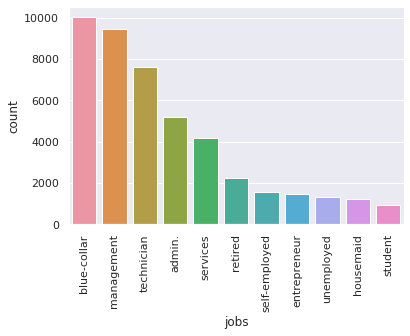

In [1331]:
sns.set_theme(style = 'darkgrid', palette='pastel')
df_job = pd.DataFrame(df.job.value_counts()).sort_values("job", ascending = False).reset_index()
df_job.rename(columns = {'index':"jobs","job":"count"},inplace = True)
bar = sns.barplot(data = df_job,x = df_job['jobs'], y =df_job["count"])
bar.tick_params(axis = "x", rotation = 90)

**Interpretation**

According to the above graph:
*   Blue-collored job has the highest count for insurance claim
*   student has the lowest count for insurance claim
*   It is in ordered linear fashion






Text(0.5, 1.0, 'based on marital')

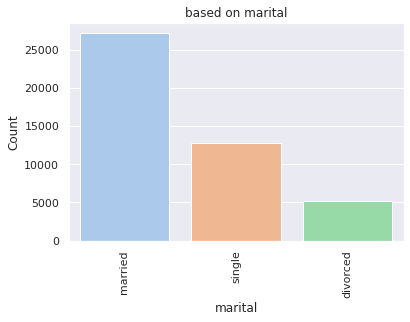

In [1332]:
sns.set_theme(style = 'darkgrid', palette='pastel')
sns.countplot(df["marital"])
plt.xticks(rotation=90)
plt.xlabel("marital")
plt.ylabel("Count")
plt.title("based on marital")

Interpretation

Based on the above graph:


*   Married people are claiming more insurance than divorced people
*   It is in linear and ordered fashion







Text(0.5, 1.0, 'based on education')

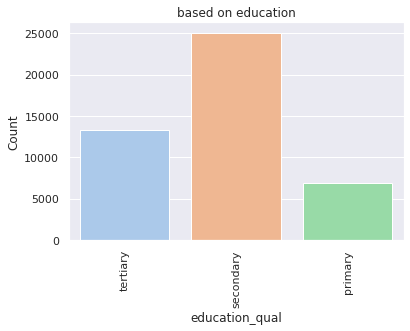

In [1323]:
sns.set_theme(style = 'darkgrid', palette='pastel')
sns.countplot(df["education_qual"])
plt.xticks(rotation=90)
plt.xlabel("education_qual")
plt.ylabel("Count")
plt.title("based on education")

Interpretation

Based on the above graph:

*  People from secondary education_qual are more prone to claim insurance than primary education_qual

*  It is linear fashion and ordered




Text(0.5, 1.0, 'based on call')

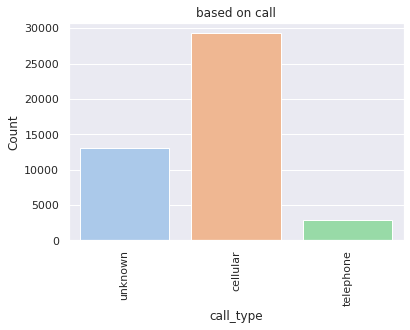

In [1324]:
sns.set_theme(style = 'darkgrid', palette='pastel')
sns.countplot(df["call_type"])
plt.xticks(rotation=90)
plt.xlabel("call_type")
plt.ylabel("Count")
plt.title("based on call")

Text(0.5, 1.0, 'based on mon')

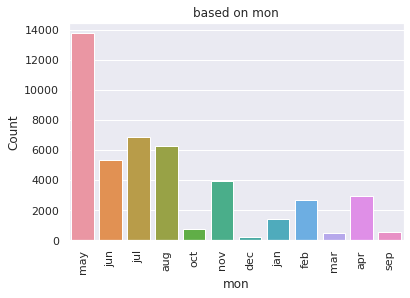

In [1333]:
sns.set_theme(style = 'darkgrid', palette='pastel')
sns.countplot(df["mon"])
plt.xticks(rotation=90)
plt.xlabel("mon")
plt.ylabel("Count")
plt.title("based on mon")

Text(0.5, 1.0, 'based on prev_outcome')

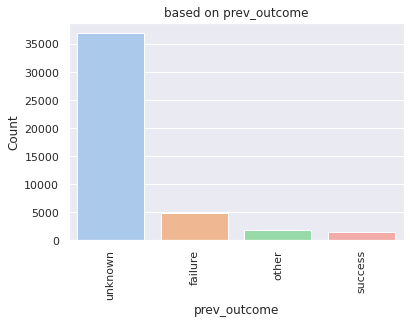

In [1334]:
sns.set_theme(style = 'darkgrid', palette='pastel')
sns.countplot(df["prev_outcome"])
plt.xticks(rotation=90)
plt.xlabel("prev_outcome")
plt.ylabel("Count")
plt.title("based on prev_outcome")

Text(0.5, 1.0, 'based on target')

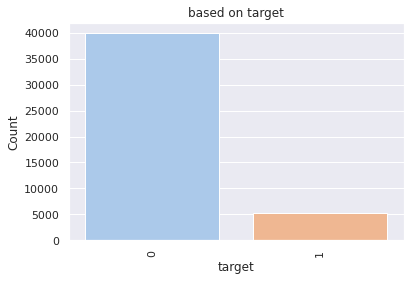

In [1335]:
sns.set_theme(style = 'darkgrid', palette='pastel')
sns.countplot(df["target"])
plt.xticks(rotation=90)
plt.xlabel("target")
plt.ylabel("Count")
plt.title("based on target")

**Categorial coumns vs target**

<AxesSubplot:ylabel='job'>

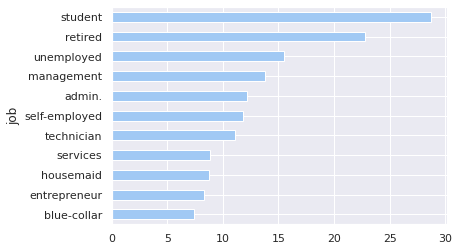

In [1336]:
(df.groupby("job")["target"].mean()*100).sort_values().plot(kind="barh")

Interpretation

According to the above graph:
* % of student claim more insurance loan than other working class 
* It is an ordered and linear relationship

<AxesSubplot:ylabel='education_qual'>

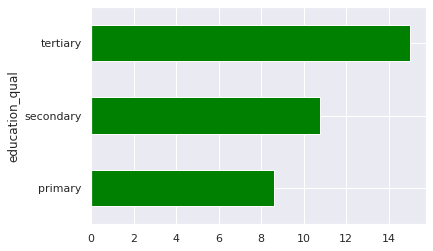

In [1337]:
(df.groupby("education_qual")["target"].mean()*100).sort_values().plot(kind="barh",color="green")

<AxesSubplot:ylabel='call_type'>

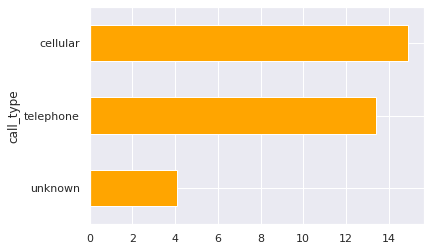

In [1338]:
(df.groupby("call_type")["target"].mean()*100).sort_values().plot(kind="barh",color="orange")

<AxesSubplot:ylabel='prev_outcome'>

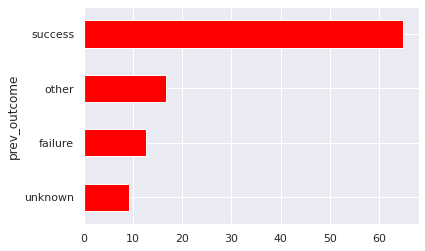

In [1339]:
(df.groupby("prev_outcome")["target"].mean()*100).sort_values().plot(kind="barh",color="red")

<AxesSubplot:ylabel='marital'>

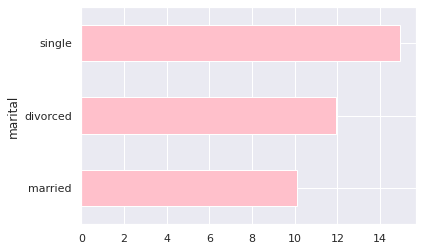

In [1340]:
(df.groupby("marital")["target"].mean()*100).sort_values().plot(kind="barh",color="pink")

Interpretation

Based on the above graph:

* % of single people buy more insurance than married
* It is in linear and ordered fashion

<AxesSubplot:ylabel='mon'>

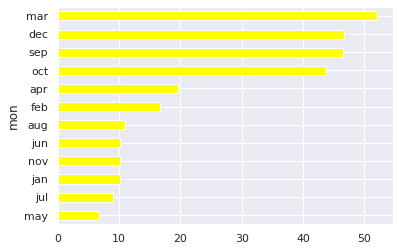

In [1341]:
(df.groupby("mon")["target"].mean()*100).sort_values().plot(kind="barh",color="yellow")

Interpretation

Based on the above graph:

*   % of people in mar buy insurance than in other months
*   During mar month,the insurance agents can many more calls and pitch the claim 




**Continuous vs target** 

<AxesSubplot:xlabel='y', ylabel='age'>

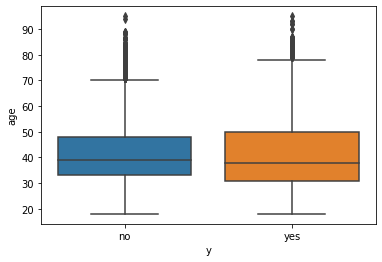

In [1205]:
sns.boxplot(data=df, x="y", y="age")

<AxesSubplot:xlabel='y', ylabel='dur'>

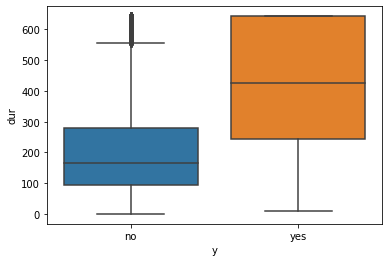

In [1206]:
sns.boxplot(data=df, x="y", y="dur")

<AxesSubplot:xlabel='y', ylabel='num_calls'>

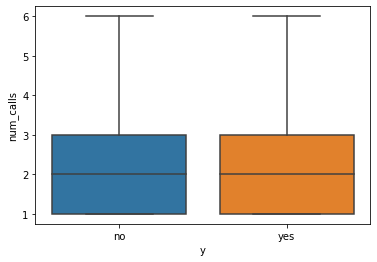

In [1207]:
sns.boxplot(data=df, x="y", y="num_calls")

<AxesSubplot:xlabel='y', ylabel='day'>

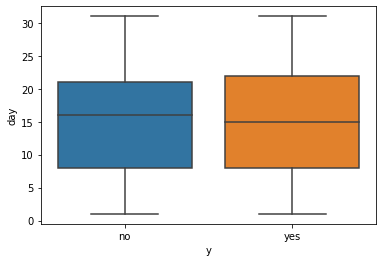

In [1208]:
sns.boxplot(data=df, x="y", y="day")

**Data Encoding**

In [1209]:
df['job'] = df['job'].map({"blue-collar":0,"entrepreneur" :1, "housemaid":2, "services":3,"technician":4,"self-employed":5, "admin.":6, "management":7,"unemployed":8,"retired":9,"student":10})
df["marital"] = df["marital"].map({"married":0,"divorced":1,"single":2})
df["education_qual"] = df["education_qual"].map({"primary":0,"secondary":1,"tertiary":2})
df["call_type"] = df["call_type"].map({"unknown":0,"telephone":1,"cellular":2})
df["mon"] = df["mon"].map({"may":0,"jul":1,"jan":2,"nov":3,"jun":4,"aug":5,"feb":6,"apr":7,"oct":8,"sep":9,"dec":10,"mar":11})
df['prev_outcome'] = df['prev_outcome'].map({'unknown':0, 'failure':1,'other':2, 'success':3})

In [1210]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7,0,2,0,5,0,261,1,0,no,0
1,44,4,2,1,0,5,0,151,1,0,no,0
2,33,1,0,1,0,5,0,76,1,0,no,0
3,47,0,0,1,0,5,0,92,1,0,no,0
4,33,0,2,1,0,5,0,198,1,0,no,0


**Splitting data into input data and output data**

In [1211]:
col = [*df.columns]
col[:-2]

['age',
 'job',
 'marital',
 'education_qual',
 'call_type',
 'day',
 'mon',
 'dur',
 'num_calls',
 'prev_outcome']

In [1212]:
col[0]

'age'

In [1213]:
x = df.loc[:,col[:-2]].values
y = df.loc[:,col[-1]].values

In [1214]:
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [1215]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(33903, 10) (11302, 10) (33903,) (11302,)


**Balancing the Data using Smoteenn**

In [1216]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(x_train,y_train) 
X_train_scaled = scaler.transform(x_train) 
X_test_scaled = scaler.transform(x_test)

In [1217]:
df.shape

(45205, 12)

In [1218]:
len(x_train),len(y_train)

(33903, 33903)

In [1219]:
len(x_test),len(y_test)

(11302, 11302)

In [1220]:
from imblearn.combine import SMOTEENN
S = SMOTEENN(sampling_strategy="all")

x_s,y_s = S.fit_resample(x_train,y_train)

In [1221]:
len(x_s),len(y_s)

(50109, 50109)

In [1222]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
target            0
dtype: int64

In [1223]:
df_Bal = pd.DataFrame(x_s, columns = df.columns[:-2])

In [1224]:
df_Bal['y'] = y_s

In [1225]:
len(df_Bal[df_Bal['y']==1])/len(df_Bal)

0.5621744596779021

**Building Machine Learning Model**

In [1226]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb


**Logistic Regression**

In [1227]:
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression()
Log_reg.fit(x_s,y_s)
Log_reg.score(x_test,y_test)


0.7295168996637763

In [1228]:
from sklearn.metrics import roc_auc_score


In [1229]:
Log_reg.score(x_test,y_test)
S = roc_auc_score(y_test,Log_reg.predict_proba(x_test)[:, 1])

In [1230]:
S

0.8682519201228879

**K Nearest Neighbour Regression**

In [1231]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_s,y_s)
KNN.score(x_test,y_test)

0.7388072907450008

In [1232]:
h = roc_auc_score(y_test, KNN.predict_proba(x_test)[:, 1])
h

0.8064914362519201

In [1233]:
from sklearn.model_selection import cross_val_score
knn_values=np.arange(1, 50)
cross_val_knn=[]
for k in knn_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_s,y_s)
  cross_val = cross_val_score(knn, x_test, y_test,cv = 15).mean()
  print("K value : ", k, "cross_val_score : ", cross_val)
  cross_val_knn.append(cross_val)
print("The best K-Value is {} and Cross_val_score is: {}".format(np.argmax(cross_val_knn) + 10, max(cross_val_knn)))
     

K value :  1 cross_val_score :  0.8623231800179183
K value :  2 cross_val_score :  0.8859491594482664
K value :  3 cross_val_score :  0.8832945259926988
K value :  4 cross_val_score :  0.8874549547169411
K value :  5 cross_val_score :  0.8832062260829947
K value :  6 cross_val_score :  0.8852420556500785
K value :  7 cross_val_score :  0.8832057564026239
K value :  8 cross_val_score :  0.8835609521830156
K value :  9 cross_val_score :  0.8838252648116639
K value :  10 cross_val_score :  0.8854181857891157
K value :  11 cross_val_score :  0.8848862727692236
K value :  12 cross_val_score :  0.8858603898581916
K value :  13 cross_val_score :  0.88577044606719
K value :  14 cross_val_score :  0.8866561458263614
K value :  15 cross_val_score :  0.886655558725898
K value :  16 cross_val_score :  0.886390658996786
K value :  17 cross_val_score :  0.8848868598696871
K value :  18 cross_val_score :  0.8855068379590977
K value :  19 cross_val_score :  0.886568785277399
K value :  20 cross_val_sc

**Decision Tree** 

In [1234]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_s,y_s)
DTC.score(x_test,y_test)

0.8201203326844806

In [1235]:
a = roc_auc_score(y_test, DTC.predict_proba(x_test)[:,1])
a
    

0.7958044546850999

**Random Forest Regression**

In [1236]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators= 100, max_depth = 5, max_features='sqrt') 
RFC.fit(x_s,y_s)
RFC.score(x_test,y_test)

0.7149177136789948

In [1237]:
h = roc_auc_score(y_test,RFC.predict_proba(x_test)[:, 1])
h
    

0.8885455837173578

**Extreme Gradient Boosting**

In [1238]:
from sklearn.ensemble import GradientBoostingClassifier
XGB = GradientBoostingClassifier(learning_rate=0.15,n_estimators=100)
XGB.fit(x_s,y_s)
XGB.score(x_test,y_test)
     

0.7915413201203327

In [1239]:

u = roc_auc_score(y_test, XGB.predict_proba(x_test)[:,1])
u

0.9079268049155146

In [1240]:
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = GradientBoostingClassifier(learning_rate=i,n_estimators=100, verbose = 0)
  model.fit(x_s,y_s)
  model.score(x_test,y_test)
  print("learning_rate:", i , "Train_Score:",model.score(x_train,y_train), "Cross_Val_score:",np.mean(cross_val_score(model, x_test,y_test,cv=10)))

learning_rate: 0.01 Train_Score: 0.6979323363714126 Cross_Val_score: 0.8928514197632292
learning_rate: 0.02 Train_Score: 0.718019054360971 Cross_Val_score: 0.8978936331698005
learning_rate: 0.03 Train_Score: 0.7377813172875557 Cross_Val_score: 0.901078926159793
learning_rate: 0.04 Train_Score: 0.7523817951213757 Cross_Val_score: 0.9018747603733873
learning_rate: 0.05 Train_Score: 0.7604341798660885 Cross_Val_score: 0.9039984194424232
learning_rate: 0.06 Train_Score: 0.7662743709996166 Cross_Val_score: 0.9054145051368121
learning_rate: 0.07 Train_Score: 0.7714951479220128 Cross_Val_score: 0.9062104958412558
learning_rate: 0.08 Train_Score: 0.7738253251924608 Cross_Val_score: 0.9054147398730858
learning_rate: 0.09 Train_Score: 0.7803439223667522 Cross_Val_score: 0.9062987566802032
learning_rate: 0.1 Train_Score: 0.7813467834704894 Cross_Val_score: 0.9074493556489284
learning_rate: 0.11 Train_Score: 0.7845323422705955 Cross_Val_score: 0.9070066430365484
learning_rate: 0.12 Train_Score: 0.

In [1241]:
print("Learning rate : ",  " Train score : " , model.score(x_train_scaled, y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train_scaled, y_train, cv=10)))


Learning rate :   Train score :  0.8806595286552813  Cross-Val score :  0.8764415609947903


**AUROC_Score Model**

---



---



In [1242]:
for i in [Log_reg,KNN,DTC,RFC,XGB]:
  auroc_score = roc_auc_score(y_test, i.predict_proba(x_test)[:, 1])*100
  print("AUROC_SCORE model is :",(i, round(auroc_score,2)))

AUROC_SCORE model is : (LogisticRegression(), 86.83)
AUROC_SCORE model is : (KNeighborsClassifier(), 80.65)
AUROC_SCORE model is : (DecisionTreeClassifier(), 79.58)
AUROC_SCORE model is : (RandomForestClassifier(max_depth=5), 88.85)
AUROC_SCORE model is : (GradientBoostingClassifier(learning_rate=0.15), 90.79)
